In [86]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

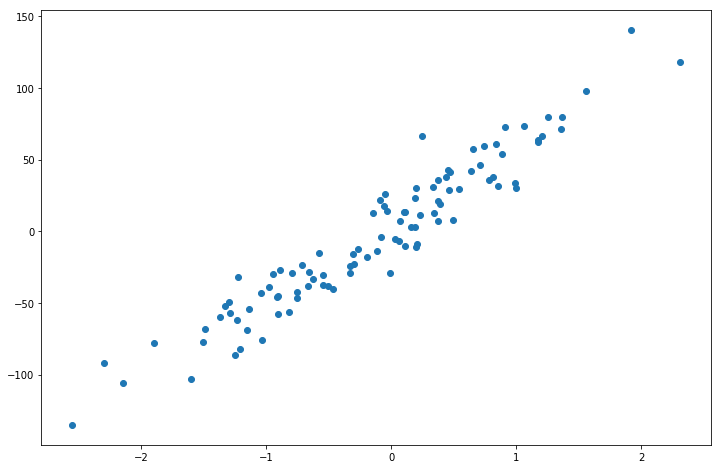

In [92]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_features=1, noise=15)
fig = plt.figure(figsize=(12, 8))
plt.scatter(X, y)
X_train = np.hstack((np.ones((X.shape[0], 1)), X))

In [93]:
# setup Simple Regression
n_features = 1
n_samples = X_train.shape[0]
X_inp = tf.placeholder(dtype=tf.float32, shape=(n_samples, 2))
weights = tf.Variable(tf.random_normal((1, 2)))
y_pred = tf.matmul(weights, tf.transpose(X_inp))
error = tf.losses.mean_squared_error(y.reshape(-1, 1), tf.transpose(y_pred))
init = tf.global_variables_initializer()  

# Reduce error by gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(error)

In [94]:
with tf.Session() as sess:
    sess.run(init)
    n_iterations = 500
    for _ in range(n_iterations):
        sess.run(train, feed_dict={X_inp: X_train})
        trained_weights = weights.eval()
        y_pred_plot = sess.run(y_pred, feed_dict={X_inp: X_train})

Text(0.5,1,'Simple Linear Regression using TensorFlow')

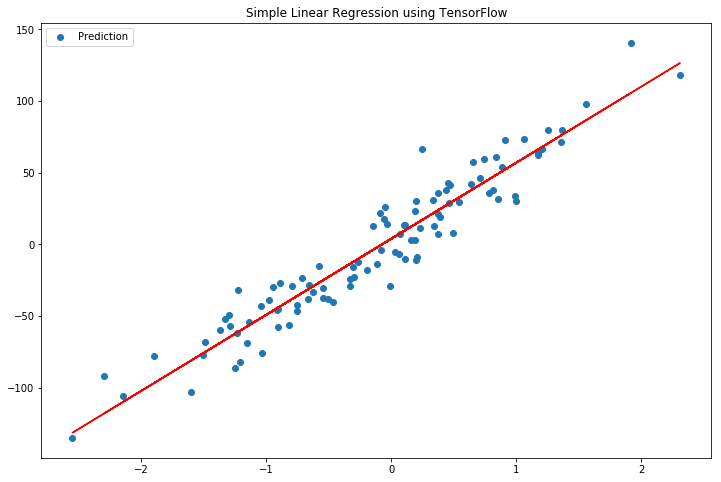

In [98]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X, y, label="Prediction")
plt.plot(X, y_pred_plot.T, color="red")
plt.legend()
plt.title("Simple Linear Regression using TensorFlow")